In [1]:
library(RCurl)
#library(OneR)
library(ggplot2)
library(vcd) # for mosaicplot()
library(GoodmanKruskal)

Loading required package: bitops

Loading required package: grid



In [2]:
# https://duttashi.github.io/blog/to-eat-or-not-to-eat/

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
#Create Data set from the Data in URL
DAT=getURL(url)
#mushroom_dataSet

In [4]:
mushrooms_tbl = read.table(file = url, header = FALSE, sep = ",")
print(head(mushrooms_tbl))

  V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 V21
1  p  x  s  n  t  p  f  c  n   k   e   e   s   s   w   w   p   w   o   p   k
2  e  x  s  y  t  a  f  c  b   k   e   c   s   s   w   w   p   w   o   p   n
3  e  b  s  w  t  l  f  c  b   n   e   c   s   s   w   w   p   w   o   p   n
4  p  x  y  w  t  p  f  c  n   n   e   e   s   s   w   w   p   w   o   p   k
5  e  x  s  g  f  n  f  w  b   k   t   e   s   s   w   w   p   w   o   e   n
6  e  x  y  y  t  a  f  c  b   n   e   c   s   s   w   w   p   w   o   p   k
  V22 V23
1   s   u
2   n   g
3   n   m
4   s   u
5   a   g
6   n   g


In [5]:
colnames(mushrooms_tbl) = c("class","cap.shape","cap.surface","cap.color","bruises",
                                   "odor","gill.attachment","gill.spacing","gill.size",
                                   "gill.color","stalk.shape","stalk.root","stalk.surface.above.ring",
                                   "stalk.surface.below.ring","stalk.color.above.ring","stalk.color.below.ring",
                                   "veil.type","veil.color","ring.number","ring.type","spore.print.color",
                                   "population","habitat")


In [6]:
mushrooms_tbl.levels=cbind.data.frame(Variable=names(mushrooms_tbl), 
                                      Total_Levels=
                                      sapply(mushrooms_tbl,function(x){as.numeric(length(levels(x)))}))

In [7]:
#print(head(mushrooms_tbl.levels))
print(mushrooms_tbl.levels)

                                         Variable Total_Levels
class                                       class            2
cap.shape                               cap.shape            6
cap.surface                           cap.surface            4
cap.color                               cap.color           10
bruises                                   bruises            2
odor                                         odor            9
gill.attachment                   gill.attachment            2
gill.spacing                         gill.spacing            2
gill.size                               gill.size            2
gill.color                             gill.color           12
stalk.shape                           stalk.shape            2
stalk.root                             stalk.root            5
stalk.surface.above.ring stalk.surface.above.ring            4
stalk.surface.below.ring stalk.surface.below.ring            4
stalk.color.above.ring     stalk.color.above.ring      

In [8]:
#mushroom_1R = OneR(type ~ ., data = mushrooms_tbl)
#print(summary(mushroom_1R))

In [9]:
levels(mushrooms_tbl$class)=c("edible","poisonous")
levels(mushrooms_tbl$cap.shape)=c("bell","conical","flat","knobbed","sunken","convex") 
levels(mushrooms_tbl$cap.surface)=c("fibrous","grooves","smooth","scaly")
levels(mushrooms_tbl$cap.color)=c("buff","cinnamon","red","gray","brown","pink","green","purple","white","yellow")
levels(mushrooms_tbl$bruises)=c("bruisesno","bruisesyes")
levels(mushrooms_tbl$odor)=c("almond","creosote","foul","anise","musty","nosmell","pungent","spicy","fishy")
levels(mushrooms_tbl$gill.attachment)=c("attached","free")
levels(mushrooms_tbl$gill.spacing)=c("close","crowded")
levels(mushrooms_tbl$gill.size)=c("broad","narrow")
levels(mushrooms_tbl$gill.color)=c("buff","red","gray","chocolate","black","brown",
                                   "orange","pink","green","purple","white","yellow")
levels(mushrooms_tbl$stalk.shape)=c("enlarging","tapering")
table(mushrooms_tbl$stalk.root) # has a missing level coded as ? 
levels(mushrooms_tbl$stalk.root)=c("missing","bulbous","club","equal","rooted")
levels(mushrooms_tbl$stalk.surface.above.ring)=c("fibrous","silky","smooth","scaly")
levels(mushrooms_tbl$stalk.surface.below.ring)=c("fibrous","silky","smooth","scaly")
levels(mushrooms_tbl$stalk.color.above.ring)=c("buff","cinnamon","red","gray","brown",
                                               "orange","pink","white","yellow")
levels(mushrooms_tbl$stalk.color.below.ring)=c("buff","cinnamon","red","gray","brown",
                                               "orange","pink","white","yellow")
levels(mushrooms_tbl$veil.type)=c("partial")
levels(mushrooms_tbl$veil.color)=c("brown","orange","white","yellow")
levels(mushrooms_tbl$ring.number)=c("none","one","two")
levels(mushrooms_tbl$ring.type)=c("evanescent","flaring","large","none","pendant")
levels(mushrooms_tbl$spore.print.color)=c("buff","chocolate","black","brown","orange",
                                          "green","purple","white","yellow")
levels(mushrooms_tbl$population)=c("abundant","clustered","numerous","scattered","several","solitary")
levels(mushrooms_tbl$habitat)=c("woods","grasses","leaves","meadows","paths","urban","waste")



   ?    b    c    e    r 
2480 3776  556 1120  192 

ERROR: Error in table(mushrooms_tbl$cap - shape, mushrooms_tbl$class): object 'shape' not found


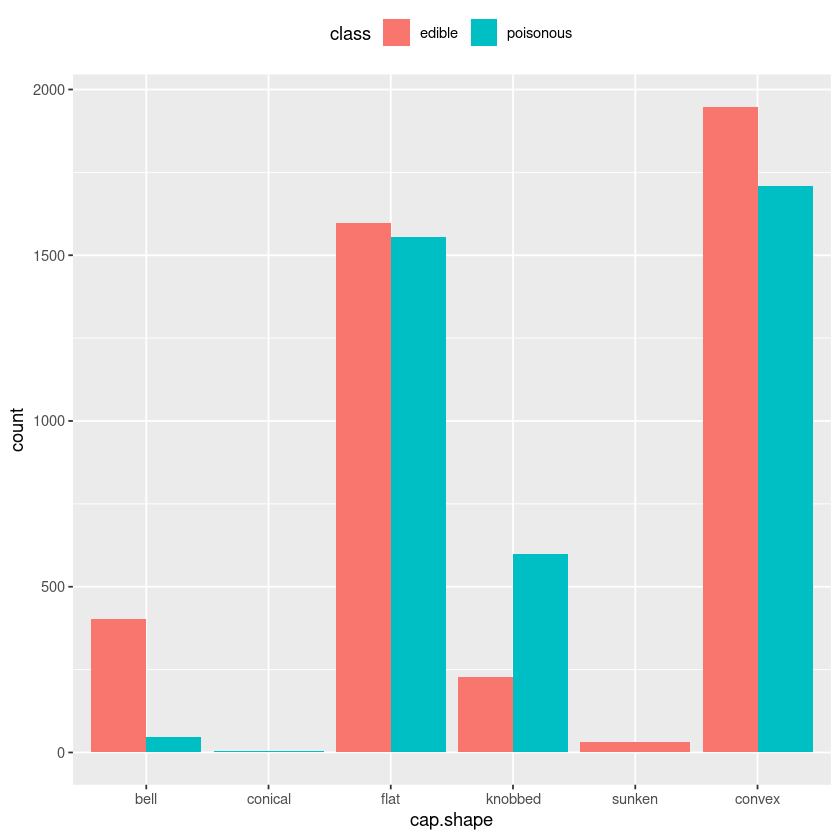

In [10]:
p= ggplot(data = mushrooms_tbl)
p+geom_bar(mapping = aes(x = cap.shape, fill=class), position = position_dodge())+ theme(legend.position = "top")
table(mushrooms_tbl$cap-shape, mushrooms_tbl$class)

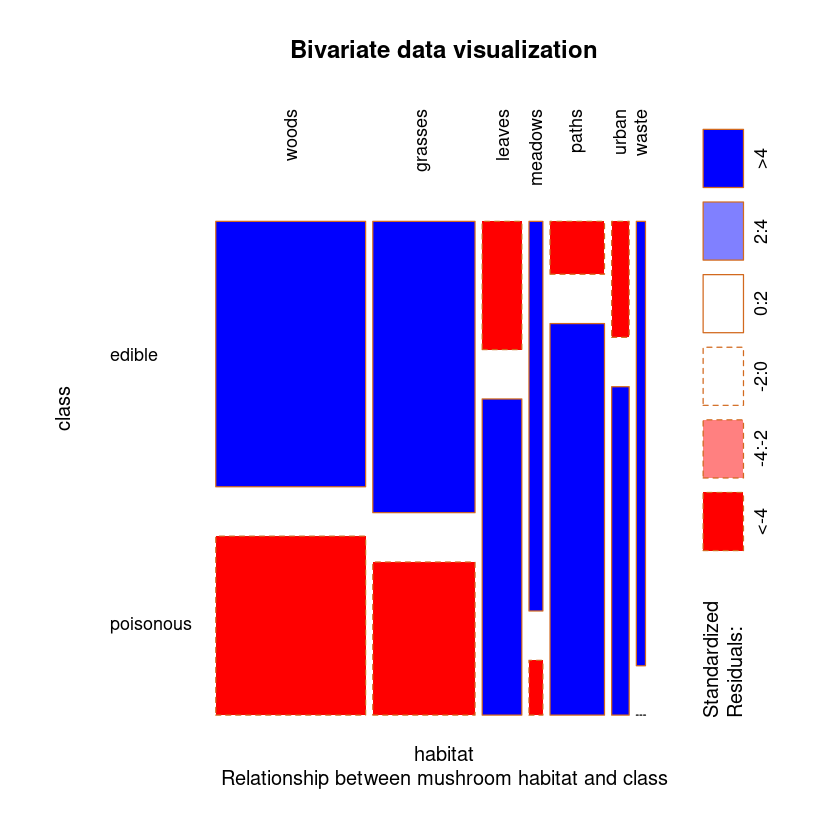

In [11]:
mosaicplot(~ habitat+class, data = mushrooms_tbl,cex.axis = 0.9, shade = TRUE,
           main="Bivariate data visualization",
           sub = "Relationship between mushroom habitat and class",
           las=2, off=10,border="chocolate",xlab="habitat", ylab="class" )

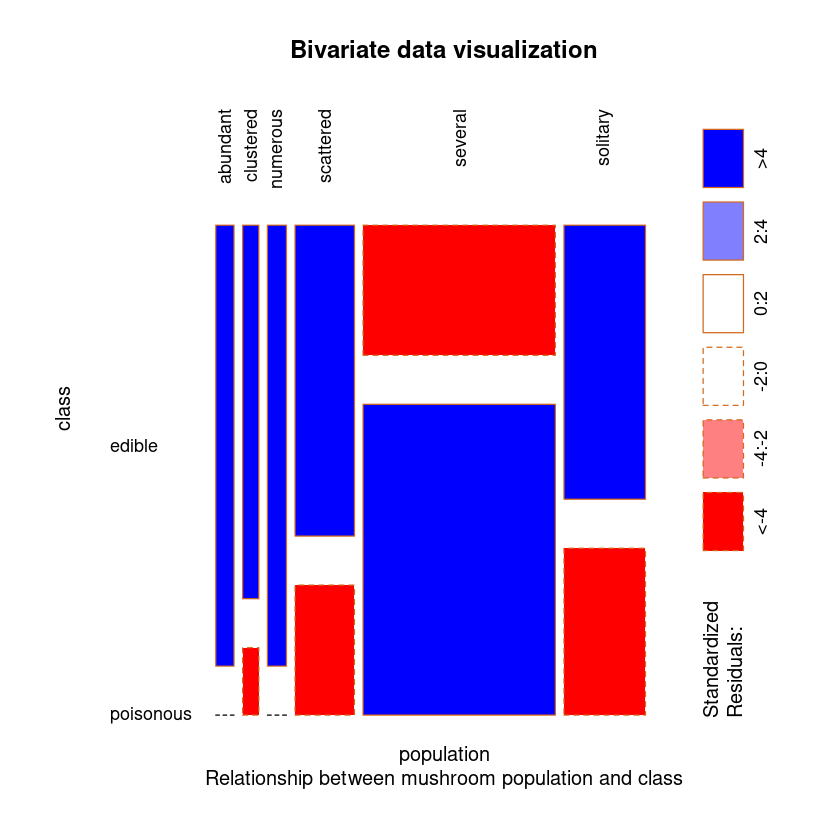

In [12]:
mosaicplot(~ population+class, data = mushrooms_tbl,
           cex.axis = 0.9, shade = TRUE,
           main="Bivariate data visualization",
           sub = "Relationship between mushroom population and class",
           las=2, off=10,border="chocolate",xlab="population", ylab="class")

In [13]:
chisq.test(mushrooms_tbl$cap.shape, mushrooms_tbl$cap.surface, correct = FALSE)

Warning message in chisq.test(mushrooms_tbl$cap.shape, mushrooms_tbl$cap.surface, :
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  mushrooms_tbl$cap.shape and mushrooms_tbl$cap.surface
X-squared = 1011.5, df = 15, p-value < 2.2e-16


In [14]:
# since the p-value is < 2.2e-16 is less than the cut-off value of 0.05, we can reject the null 
# hypothesis in favor of alternative hypothesis and conclude, that the variables, cap.shape and 
# cap.surface are dependent to each other.

In [15]:
chisq.test(mushrooms_tbl$habitat, mushrooms_tbl$odor, correct = FALSE)

Warning message in chisq.test(mushrooms_tbl$habitat, mushrooms_tbl$odor, correct = FALSE):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  mushrooms_tbl$habitat and mushrooms_tbl$odor
X-squared = 6675.1, df = 48, p-value < 2.2e-16


In [16]:
# Similarly, the variables habitat and odor are dependent to each other as the p-value < 2.2e-16 
# is less than the cut-off value 0.05.

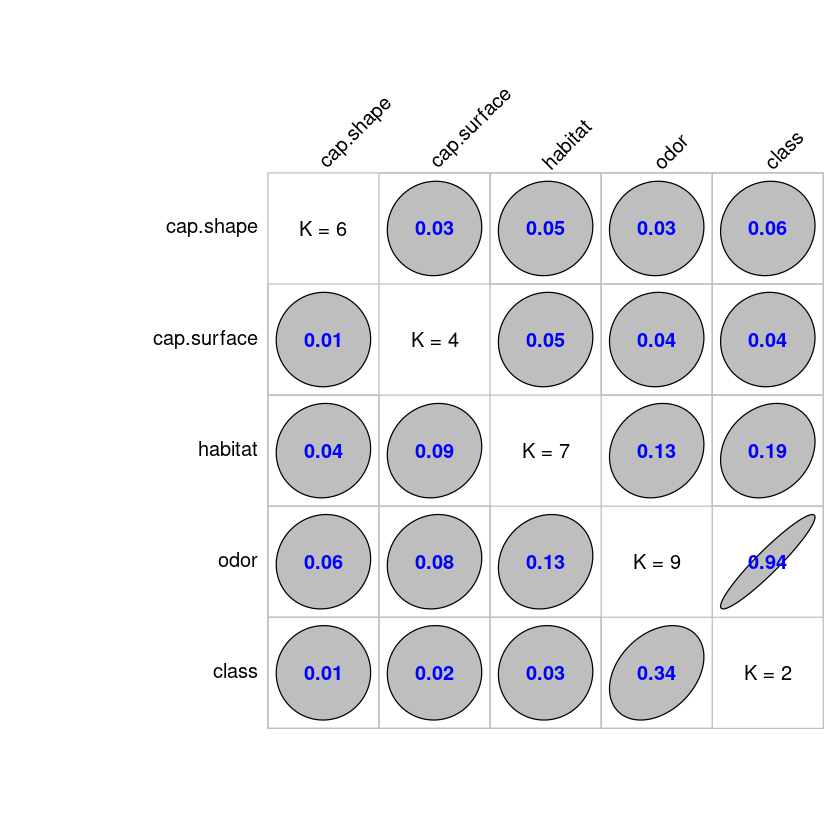

In [18]:
varset1= c("cap.shape","cap.surface","habitat","odor","class")
mushroomFrame1= subset(mushrooms_tbl, select = varset1)
GKmatrix1= GKtauDataframe(mushroomFrame1)
plot(GKmatrix1, corrColors = "blue")